# 检查按钮

使用复选框按钮切换视觉元素的显示和隐藏。

这个程序展示了 {class}`~matplotlib.widgets.CheckButtons` 的使用，类似于复选框。我们显示了 3 个不同的正弦波，并可以使用检查按钮选择要显示的波形。

可以通过 `check_props`、`frame_props` 和 `label_props` 参数对检查按钮进行样式设置。这些参数各自接受一个包含艺术家属性名称键和长度与按钮数量匹配的设置列表值的字典。

Using matplotlib backend: module://matplotlib_inline.backend_inline


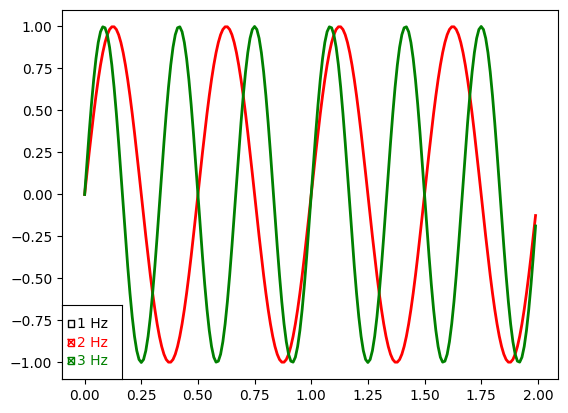

In [1]:
# %matplotlib tk
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2, color='black', label='1 Hz')
l1, = ax.plot(t, s1, lw=2, color='red', label='2 Hz')
l2, = ax.plot(t, s2, lw=2, color='green', label='3 Hz')

lines_by_label = {l.get_label(): l for l in [l0, l1, l2]}
line_colors = [l.get_color() for l in lines_by_label.values()]

# Make checkbuttons with all plotted lines with correct visibility
rax = ax.inset_axes([0.0, 0.0, 0.12, 0.2])
check = CheckButtons(
    ax=rax,
    labels=lines_by_label.keys(),
    actives=[l.get_visible() for l in lines_by_label.values()],
    label_props={'color': line_colors},
    frame_props={'edgecolor': line_colors},
    check_props={'facecolor': line_colors},
)


def callback(label):
    ln = lines_by_label[label]
    ln.set_visible(not ln.get_visible())
    ln.figure.canvas.draw_idle()

check.on_clicked(callback)

plt.show()